<img src="./images/aims-za-logo.jpeg" alt="drawing" style="width:400px;"/>
<h1 style="text-align: center;"><a title="EMS-AIMS-ZA-2024-25" href="https://evansdoe.github.io/aims-za/ems/2024-25">Experimental Mathematics Using SageMath — AIMS-ZA-2024-25</a></h1>


## Instructors: 

* <a href="http://evansdoe.github.io">**Evans Ocansey**</a>

****

<!--NAVIGATION-->
< [3. Starting to program](ems_2020_day_03_starting_to_program.ipynb)|[Table of contents](ems_2020_table_of_contents.ipynb) | [5. Sum Of Squares And Plotting](ems_2020_day_05_sum_of_squares_and_plotting.iynb)>


****




In experimental science, sometimes you have to rethink your problem.  Perhaps a different experiment is needed, perhaps a different model, or something else. Likewise, in experimental mathematics, sometimes it is necessary to use a different approach.  We will look at one such approach today; we will turn questions about numbers into questions about geometry. Also, I know that some of you are excited to use more Sage for your computation outside of this class, so we will take a little time looking at resources.


## Reviewing the Problem


Our motivational problem is the following: Given positive integers $a$ and $b$, what numbers $n$ can be written in the form $ax+by$, where $x,y\geq 0, \in \mathbb{Z}$?

It has already led to several related questions.  That is exploration!


Is there a number $N$ for which all $n\geq N$ can be written $ax+by$, but $N-1$ cannot be?  (We called this the _conductor_.)

If there is such a number, can we find a formula or some other means of computing it?
How _many_ numbers can be written $ax+by$, if we know $a,b$?
Remember, you can definitely try to organize your data.  Did anyone get these results?

In [1]:
L = [[(2,3), 1, 2], [(3, 4), 5, 6], [(3,6), oo, 'None'], [(5,7), 23, 24], [(7,11), 59, 60], [(9,11), 79, 80] ]

table(L,header_row=["$(a,b)$",'Frobenius Number', 'Conductor', '# Not Writable'], frame=True)

+---------+------------------+-----------+
| $(a,b)$ | Frobenius Number | Conductor |
+=========+==================+===========+
| (2, 3)  | 1                | 2         |
+---------+------------------+-----------+
| (3, 4)  | 5                | 6         |
+---------+------------------+-----------+
| (3, 6)  | +Infinity        | None      |
+---------+------------------+-----------+
| (5, 7)  | 23               | 24        |
+---------+------------------+-----------+
| (7, 11) | 59               | 60        |
+---------+------------------+-----------+
| (9, 11) | 79               | 80        |
+---------+------------------+-----------+

<p>Let us work out by counting the numbers that are not writable. Let's start with $a=2$, $b=3$ and $a=3$, $b=4$.</p>

1

<h3>A Useful Fact</h3>
<p>Recall that we discussed a few facts about integers earlier.</p>
<p><strong>Fact</strong>: If $a$, $b>0$ are integers then we can write $a=qb+r$ with $0\leq r<b$ and $q$ integers.</p>
<p><strong>Fact</strong>: In this situation, $\gcd(a,b)=\gcd(b,r)$.</p>
<p>Here is another useful fact for our situation.  Many of you already know this.</p>
<p><strong>Fact</strong>: For a given $n\in \mathbb{Z}$, the equation $ax+by=n$ has a solution in integers <em>if and only if</em> $\gcd(a,b) \mid n$.</p>
<p>That is, you can't even write $ax+by=n$ if the greatest common divisor of $a$ and $b$ doesn't divide $n$.  This was studied by the Greeks, known by Aryabhata in the Indian Middle Ages, and rediscovered by Bachet de Méziriac about 1600.</p>
<p><strong>Implication For Us</strong>: If $a$ and $b$ have a common divisor bigger than 1, there cannot be a conductor.</p>
<p>We already saw an example in class. I want you to think about why this might be.</p>
<h3>Rethinking the Problem</h3>
<p>I can prove the facts above.  But just proving things are true and using them isn't enough.  <em>Why </em>is it true, intuitively?  I believe the right place to do this is in geometry.</p>

In [3]:
@interact
def _(a = slider(1, 20, 1, 3), \
      b = slider(1, 20, 1, 4), \
      c = slider(1, 30, 1, 6), \
      viewsize = slider(5, 30, 1, 5)):
    
    # plot the equation of the line y = - (a/b)*x + c/b.
    
    p = plot(-(a/b) * x + c/b, (x, -1, viewsize), plot_points = 200)
    
    # integer coordiantes for the lattice 
    
    lattice_pts = [[i,j] for i in [-1..viewsize] for j in [-viewsize..viewsize]]
    
    # plot integer lattice with pointsize set to 20 and rgbcolor set to (0, 0, 0).
    
    plot_lattice_pts = points(lattice_pts, rgbcolor = (0, 0, 0), pointsize = 20)
    
    # Check if gcd(a, b) divides c. 
    
    if mod(c, gcd(a, b)) == 0:
        
        # Get integers coordinates x and y in lattice_pts that lies on the line y = - (a/b)*x + c/b. 
        # That is, the integer coordinates that satisfy the equation a * x + b * y = c.
        
        line_pts = [coords for coords in lattice_pts if a * coords[0] + b * coords[1] == c]
        
        # Check if line_pts is empty. In other words, there are no integer coordinates x and y in lattice_pts 
        # that lie on the line y = - (a/b)*x + c/b or satisfies the equation a * x + b * y = c. Note that
        # in general, this does not mean that there are no solution since there might exist integer 
        # coordinates which are not contained in lattice_pts. 
        
        if line_pts == []:
            
            # Define an empty Graphics object.
            
            plot_line_pts = Graphics()
            
        else:
            
            # plot the integer coordinates x and y in lattice_pts that lie on the line y = - (a/b)*x + c/b or 
            # satisfies the equation a * x + b * y = c.
             
            plot_line_pts = points(line_pts, rgbcolor = (0, 0, 1), pointsize = 20)
            
        # Print sentence indicating the set of solution, (integer coordinates) satisfying the equation
        # a * x + b * y = c.
        
        pretty_print(html(r"Showing solutions to $%s\,x + %s\,y = %s$ in this viewing window" \
                          %(str(a), str(b), str(c))))
        
        # Combine the three plot objects together. 
        
        show(p + plot_lattice_pts + plot_line_pts, figsize=[5, 5], xmin = -1, xmax = viewsize, \
             ymin = -1, ymax = viewsize)
        
    # If gcd(a, b) does not divide c.
    
    else:
        
        # Print a sentence stating the gcd(a,b) does not divide c.
        
        pretty_print(html(r"The gcd of $%s$ and $%s$ is $%s$, which does not divide $%s$,"\
                          %(str(a), str(b), str(gcd(a,b)), str(c))))
        
        # Print a sentence stating that there are no integer solutions satisfying the equation 
        
        pretty_print(html(r"so there are no non-negative integer solutions to $%s\,x + %s\,y = %s$"\
                          %(str(a), str(b), str(c))))
        
        # Combine plot objects.
        
        show(p + plot_lattice_pts, figsize = [5, 5], xmin = -1, xmax = viewsize, ymin = -1, ymax = viewsize)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<p>(The little gray dots in the graph above are called <em>the integer lattice</em>.  You may treat this as a definition.  There are many lattices, but only one which is basically all the intersections of $y=m,x=n$ for all integers $m,n$.  So for instance $(-2,3)$ is probably visible; however, note that $(-1,1/2)$ is not a little dot, because it doesn't have integer values.)</p>
<p>Since $ax+by=c$ may be thought of as a line (in fact, the line $$y=-\frac{a}{b}x+\frac{c}{b}$$ with slope $-\frac{a}{b}$), we now have a <strong>completely different interpretation</strong> of this very basic number theory question (the "linear Diophantine equation").  It is simply asking, "When (for what $a$, $b$, $c$ combinations) does the line hit this lattice?  If it does, can you tell me all intersections?"   If you play around with the sliders you will quickly see that things work out just as promised in the theorems. </p>
<p>Now let's connect this to some of the conductor questions. Given positive integers $a$ and $b$:</p>
<ul>
<li>How many ways are there to write $n$ as $ax+by$, given $n$?
<ul>
<li>How many lattice points (including the axes) hit this line, given $n$?</li>
</ul>
</li>
<li>How is the problem different if we only allow <em>positive</em> $x$ and $y$ not just nonnegative?
<ul>
<li>How does the problem change if we do <em>not </em>allow the axes to be included?</li>
</ul>
</li>
</ul>
<div>By the way, this second question is very closely related to an extremely applied area, <em>integer programming</em>.</div>

Solutions to <script type="math/tex">3\,x + 4\,y = 4</script>:

Number of nonnegative lattice points = 1

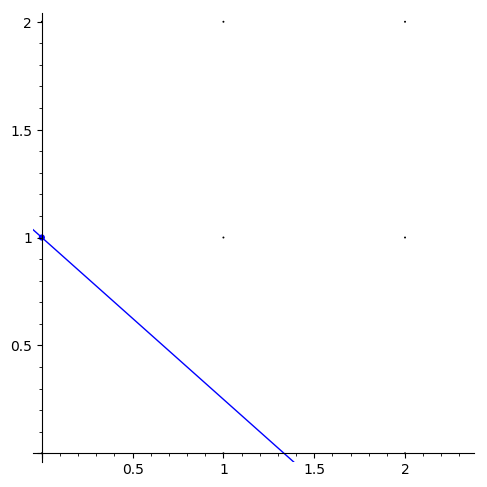

In [5]:
@interact
def _(a = slider(1, 20, 1, 3), b = slider(1, 20, 1, 4), c = slider(1, 40, 1, 4), viewsize = slider(5, 30, 1, 5), positive_only = False):
    
    ym = c/b + 1    # ym is the value of ymax
    xm = c/a + 1    # xm is the value of xmax
    
    # plot the equation of the line `y = - (a/b)*x + c/b`.
    
    p = plot(-(a/b) * x + c/b, -1, xm, plot_points = 200)
    
    # integer coordiantes for the lattice
    
    lattice_pts = [[i,j] for i in [0..xm] for j in [0..ym]]
    
    # plot integer lattice
    
    plot_lattice_pts = points(lattice_pts, rgbcolor = (0, 0, 0), pointsize = 2)
    
    # Check if gcd(a, b) divides c.
    
    if mod(c, gcd(a, b)) == 0:
        
        # If the parameter positive_only is True. That is, find positive x and y such that `a*x + b*y = c` holds.
        
        if positive_only:
            
            # Get positive integers x and y in lattice_pts that lies on the line `y = - (a/b)*x + c/b`. 
            # These are positive integers that satisfy the equation `a * x + b * y = c`.
            
            line_pts = [coords for coords in lattice_pts if (coords[0] > 0) and (coords[1] > 0) and (a * coords[0] + b * coords[1] == c)]
            
        # If the parameter positive_only is False. That is, find non-negative x and y such that `a*x + b*y = c` holds.
        
        else:
            
            # Get non-negative integers x and y in lattice_pts that lies on the line `y = - (a/b)*x + c/b`. 
            # These are non-negative integers that satisfy the equation a * x + b * y = c.
            
            line_pts = [coords for coords in lattice_pts if (coords[0] >= 0) and (coords[1] >= 0) and (a * coords[0] + b * coords[1] == c)]
            
        # Check if line_pts is empty. In other words, there are no non-negative integer points x and y in lattice_pts 
        # that lies on the line y = - (a/b)*x + c/b or satisfies the equation a * x + b * y = c. Note that in general,
        # this in effect does not mean that there are no solution since there might exist integer pairs which are not 
        # in lattice_pts.
            
        if len(line_pts) == 0:
            
            # Print solutions
            
            pretty_print(html('Solutions to $%s\,x + %s\,y = %s$:' %(str(a), str(b), str(c))))
            
            # If the parameter positive_only is True
            
            if positive_only:
                
                # Print no positive solution. 
                
                pretty_print(html('No positive lattice points at all!'))
                
            # If the parameter positive_only is False
                
            else:
                
                # Print sentence 
                
                pretty_print(html('No nonnegative lattice points at all!'))
                
            # Combine the two plot objects together.
                
            show(p + plot_lattice_pts, figsize = [5,5], xmin = 0, xmax = xm, ymin = 0, ymax = ym)
            
        else:
            
            # plot the integer points x and y in lattice_pts that lies on the line y = - (a/b)*x + c/b or 
            # satisfies the equation a * x + b * y = c.
            
            plot_line_pts = points(line_pts, rgbcolor = (0, 0, 1), pointsize = 20)
              
            pretty_print(html('Solutions to $%s\,x + %s\,y = %s$:' %(str(a), str(b), str(c))))
            
            # If the parameter positive_only is True 
            
            if positive_only:
                
                # Print sentence with positive integer solutions x and y in lattice_pts.
                
                pretty_print(html('Number of positive lattice points = ' + str(len(line_pts))))
                
            # If the parameter positive_only is False
                
            else:
                
                # Print sentence with non-negative integer solutions x and y in lattice_pts.
                
                pretty_print(html('Number of nonnegative lattice points = ' + str(len(line_pts))))
                
            # Combine the three plot objects together.
                
            show(p + plot_lattice_pts + plot_line_pts, figsize = [5,5], xmin = 0, xmax = xm, ymin = 0, ymax = ym)
            
    # If gcd(a, b) does not divide c.
     
    else:
        
        # Print solutions.
        
        pretty_print(html('Solutions to $%s\,x + %s\,y = %s$:' %(str(a), str(b), str(c))))
        
        # If the parameter positive_only is True
        
        if positive_only:
            
            # Print no positive integer solutions.
            
            pretty_print(html('No positive lattice points at all!'))
            
        else:
            
             # Print no non-negative integer solutions.
            
            pretty_print(html('No nonnegative lattice points at all!'))
            
        # Combine the two plot objects together.
            
        show(p + plot_lattice_pts, figsize = [5,5], xmin = 0, xmax = xm, ymin = 0, ymax = ym)

<p>Let's explore this - even in cases where the conductor is not very interesting.  How many such points are there in the following cases?</p>
<ul>
<li>$x+y=4$, $x+y=5$, $x+y=6$, $\ldots$</li>
<li>$2x+y=4$, $2x+y=5$, $2x+y=6$, $\ldots$</li>
<li>$2x+2y=4$, $2x+2y=5$, $2x+2y=6$, $\ldots$</li>
<li>$3x+y=4$, $3x+y=5$, $3x+y=6$, $\ldots$</li>
</ul>
<p>Again, you should be able to start <em>exploring</em> and <em>experimenting</em>.  Naturally, in this case I don't only expect you to use my graphic, which is a big challenge for you to program right now.  Try instead to write your own program to explore this question.</p>